In [1]:
%load_ext autoreload
%reload_ext autoreload
from VehicleDetection import VehicleDetection
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import statistics
from eval_utils import *
from video_utils import *
from load_utils import *

data_path = '../../AICity_data/train/S03/c010/'

In [8]:
def get_background_stats(videoPath, initFrame=1, lastFrame=514):
    vidcap = cv2.VideoCapture(videoPath)
    _, image = vidcap.read()

    ims_for_stats = lastFrame - initFrame + 1
    ims = np.zeros((ims_for_stats, image.shape[0], image.shape[1]))

    ims[0,:,:] = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    for frame in tqdm(range(initFrame, lastFrame)):
        _, image = vidcap.read()
        ims[frame,:,:] = (cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

    means = np.mean(ims, axis=0)
    stds = np.std(ims, axis=0)
    return means, stds

In [9]:
means, stds = get_background_stats(data_path + 'vdo.avi', 1, 514) # 514 is the 25% of the frames

100%|██████████| 513/513 [00:17<00:00, 29.58it/s]


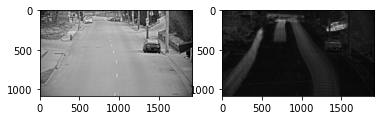

In [11]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(means, cmap='gray')
axs[1].imshow(stds, cmap='gray')

plt.show()

100%|██████████| 599/599 [00:04<00:00, 128.90it/s]


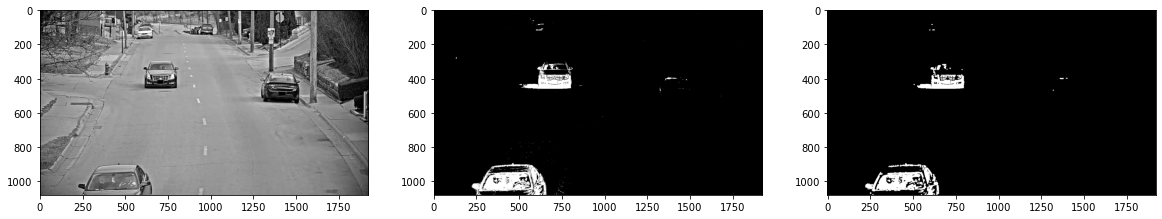

In [28]:
def cleanMask(mask, kernel_size=3):
    element = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    erosion_dst = cv2.erode(mask, element)

    return cv2.dilate(erosion_dst, element)

def remove_background(means, stds, videoPath, alpha = 4):
    vidcap = cv2.VideoCapture(videoPath)
    _, image = vidcap.read()
    num_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))

    for frame in tqdm(range(1, 600)):
        _, image = vidcap.read()
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_mask = np.zeros(img_gray.shape)
    img_mask[abs(img_gray - means) >= alpha * (stds + 2)] = 1.0
    cleaned = cleanMask(img_mask, 3)

    fig, axs = plt.subplots(1,3, figsize=(20, 10))
    axs[0].imshow(img_gray, cmap='gray')
    axs[1].imshow(img_mask, cmap='gray')
    axs[2].imshow(cleaned, cmap='gray')

    plt.show()

remove_background(means,stds, data_path + 'vdo.avi')


In [18]:
remove_background(means,stds, data_path + 'vdo.avi')

100%|██████████| 1/1 [00:00<00:00, 100.17it/s]


TypeError: Expected Ptr<cv::UMat> for argument 'src'